# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [1]:
import numpy as np

class LinearRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.w) + self.b

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.w) + self.b


## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression as SklearnLR

In [10]:
df = pd.read_csv("Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.isnull().sum()

,0
No,0
X1 transaction date,0
X2 house age,0
X3 distance to the nearest MRT station,0
X4 number of convenience stores,0
X5 latitude,0
X6 longitude,0
Y house price of unit area,0


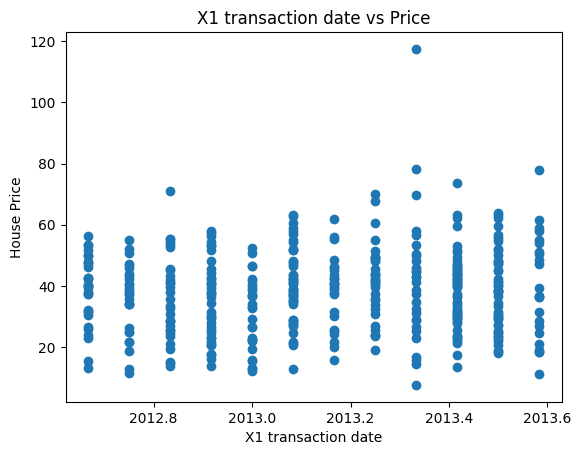

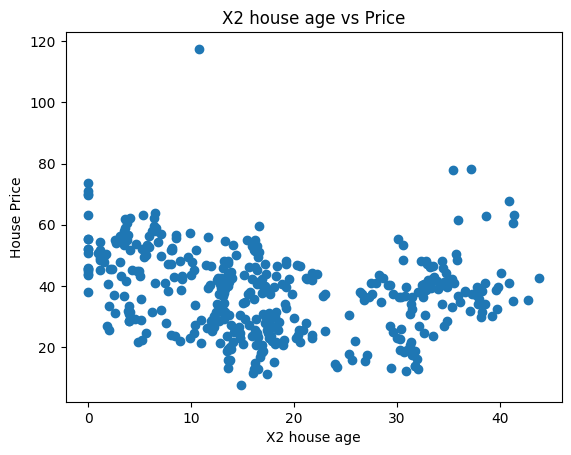

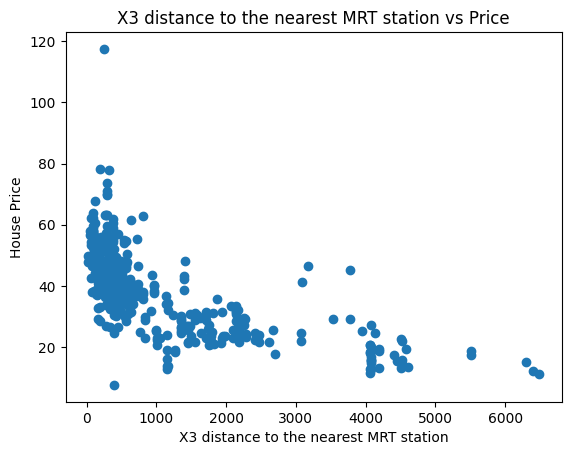

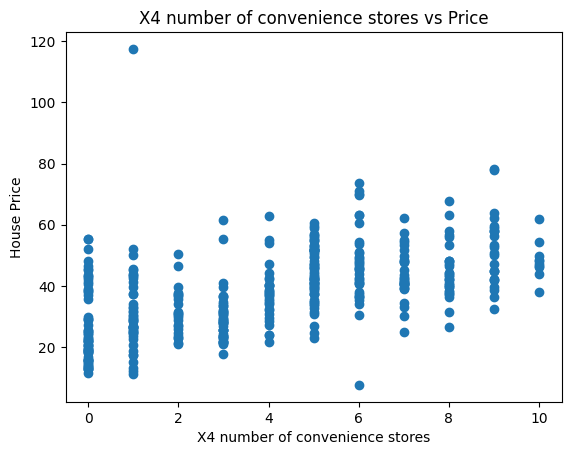

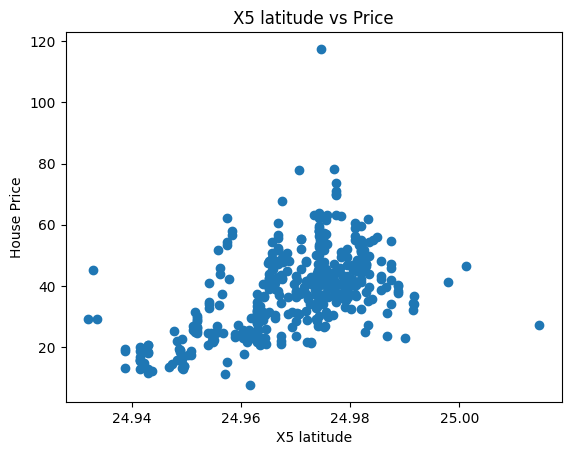

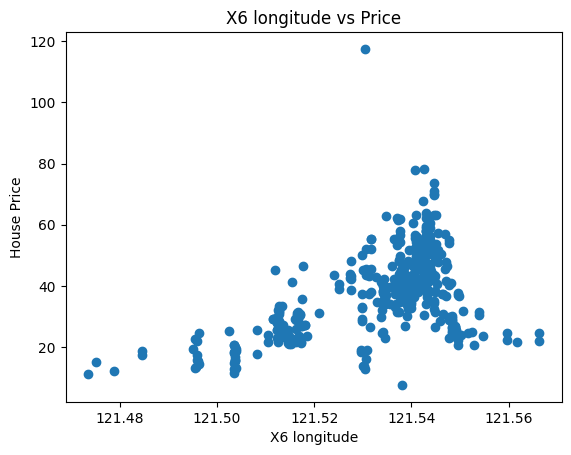

In [5]:
for col in df.columns[1:-1]:
    plt.figure()
    plt.scatter(df[col], df.iloc[:, -1])
    plt.xlabel(col)
    plt.ylabel("House Price")
    plt.title(f"{col} vs Price")
    plt.show()

In [12]:
print(df.columns)

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


In [13]:
df = df.drop(columns=["No",
                      "X1 transaction date",
                      ])
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [14]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [15]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
import numpy as np

class LinearRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.w) + self.b

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.w) + self.b


In [18]:
model_scratch = LinearRegression(lr=0.05, epochs=3000)
model_scratch.fit(X_train, y_train)

y_pred_scratch = model_scratch.predict(X_test)

In [20]:
mse_scratch = mean_squared_error(y_test, y_pred_scratch)
r2_scratch = r2_score(y_test, y_pred_scratch)

print("Linear Regression Model")
print("MSE:", mse_scratch)
print("R2:", r2_scratch)

Linear Regression Model
MSE: 65.0054284150756
R2: 0.590177794186167


In [21]:
model_sk = SklearnLR()
model_sk.fit(X_train, y_train)

y_pred_sk = model_sk.predict(X_test)

In [22]:
mse_sk = mean_squared_error(y_test, y_pred_sk)
r2_sk = r2_score(y_test, y_pred_sk)

print("Sklearn Model")
print("MSE:", mse_sk)
print("R2:", r2_sk)

Sklearn Model
MSE: 66.74857426921264
R2: 0.5791882522907397


# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [23]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [25]:
data = load_breast_cancer()

X = data.data
y = data.target

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

5. Write code for the sigmoid function and Logistic regression.


In [ ]:
def sigmoid(z):
   "..."

def sigmoid_derivative(z):
    "..."

class LogisticRegression:
    def __init__(self, learning_rate, epochs):
      #Initialise the hyperparameters of the model
        self.lr = "..."
        self.epochs = "..."

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = "..."
        self.bias = "..."

        #Implement the GD algortihm
        for _ in range(self.epochs):
            z = "..."
            y_pred = "..."

            dw = "..."
            db = "..."

            self.weights -= "..."
            self.bias -= "..."

    def predict(self, X):
      #Write the predict function
        "..."
        return y_pred

In [29]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [30]:
def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

In [31]:
class LogisticRegression:
    def __init__(self, learning_rate, epochs):
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)

        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        y_pred = (y_pred >= 0.5).astype(int)
        return y_pred.flatten()

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [39]:
model = LogisticRegression(learning_rate=0.01, epochs=5000)
model.fit(X_train, y_train)

y_pred_my = model.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred_my)
print("Accuracy:", accuracy)

Accuracy: 0.9824561403508771


In [44]:
from sklearn.linear_model import LogisticRegression as SkLogisticRegression
from sklearn.metrics import accuracy_score

#Prediction using sklearn with no Regularization
model_none = SkLogisticRegression(penalty=None, max_iter=5000)
model_none.fit(X_train, y_train)

y_pred_none = model_none.predict(X_test)
print("Sklearn (penalty=None) Accuracy:",
      accuracy_score(y_test, y_pred_none))

Sklearn (penalty=None) Accuracy: 0.9385964912280702


In [45]:
#Prediction using sklearn with Ridge Regularization
model_l2 = SkLogisticRegression(penalty="l2", solver="lbfgs", max_iter=5000)
model_l2.fit(X_train, y_train)

y_pred_l2 = model_l2.predict(X_test)
print("Sklearn (penalty=l2) Accuracy:",
      accuracy_score(y_test, y_pred_l2))

Sklearn (penalty=l2) Accuracy: 0.9736842105263158


In [47]:
#Prediction using sklearn with Lasso Regularization
model_l1 = SkLogisticRegression(penalty="l1", solver="liblinear", max_iter=5000)
model_l1.fit(X_train, y_train)

y_pred_l1 = model_l1.predict(X_test)
print("Sklearn (penalty=l1) Accuracy:",
      accuracy_score(y_test, y_pred_l1))

Sklearn (penalty=l1) Accuracy: 0.9736842105263158


In [48]:
model_en = SkLogisticRegression(
    penalty="elasticnet",
    solver="saga",
    l1_ratio=0.5,
    max_iter=5000
)
model_en.fit(X_train, y_train)

y_pred_el = model_en.predict(X_test)
print("Sklearn (penalty=elasticnet) Accuracy:",
      accuracy_score(y_test, y_pred_el))

Sklearn (penalty=elasticnet) Accuracy: 0.9736842105263158


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
print("Best Model Classification report")
print(classification_report(y_test, y_pred_my))

Best Model Classification report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [53]:
print("Best Model Confusion Matrix")
print(confusion_matrix(y_test, y_pred_my))

Best Model Confusion Matrix
[[42  1]
 [ 1 70]]


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [54]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [56]:
X = df.drop("Type", axis=1)
y = df["Type"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [58]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [59]:
X = np.array(X)
y = np.array(y)

In [71]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [60]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [68]:
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            predictions.append(self._predict_single(x))
        return np.array(predictions)

    def _predict_single(self, x):
        distances = []
        for i in range(len(self.X_train)):
            dist = euclidean_distance(x, self.X_train[i])
            distances.append((dist, self.y_train[i]))

        distances.sort(key=lambda x: x[0])
        k_nearest_labels = [label for _, label in distances[:self.k]]

        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [72]:
knn_my = KNN(k=3)
knn_my.fit(X_train, y_train)

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [74]:
from sklearn.metrics import accuracy_score

y_pred_my = knn_my.predict(X_test)

accuracy_my = accuracy_score(y_test, y_pred_my)
print("Scratch KNN Accuracy (k=3):", accuracy_my)

Scratch KNN Accuracy (k=3): 0.8148148148148148


In [76]:
for k in [1, 3, 5, 7, 9]:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"k={k}, Accuracy={acc}")

k=1, Accuracy=0.7407407407407407
k=3, Accuracy=0.8148148148148148
k=5, Accuracy=0.7222222222222222
k=7, Accuracy=0.7222222222222222
k=9, Accuracy=0.7222222222222222


In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn_sk = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
knn_sk.fit(X_train, y_train)

y_pred_sk = knn_sk.predict(X_test)

accuracy_sk = accuracy_score(y_test, y_pred_sk)
print("Sklearn KNN Accuracy (k=3):", accuracy_sk)

Sklearn KNN Accuracy (k=3): 0.7962962962962963
